<a href="https://colab.research.google.com/github/khanhvy31/The-Bank-Account-Fraud-BAF-/blob/main/The_Bank_Account_Fraud_(BAF)_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PART 1: DATA PREPROCESSING

Dataset from https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022

The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!

In [ ]:
# Sklearn and Pandas Setup
#@title 1.1 Import useful libraries
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 
import warnings
warnings.filterwarnings('ignore')

Read the Data and Print the first five lines

In [ ]:
data = pd.read_csv('sp23_datachallenge.csv')
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


print data information to check the type of column and if data has null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

Since data has no null values, we can start to do EDA - Exploratory Data Analysis

### 1.2 EDA Part - Numerical Data

In [ ]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


#### 1.2.1 Histogram to see the distribution of each attribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca032b0fd0>,
      dtype=object)

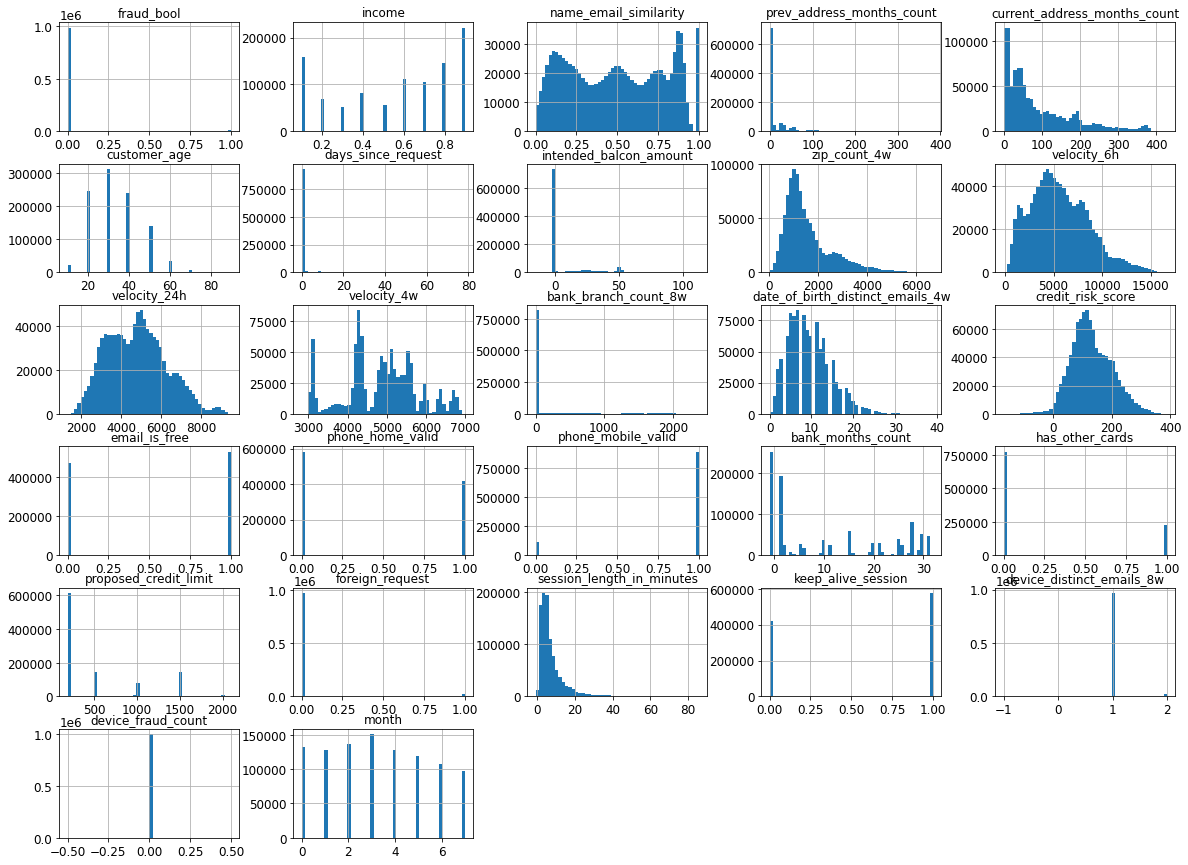

In [ ]:
data.hist(bins = 50, figsize = (20,15))


#### 1.2.2 Print correlation between features and label

In [ ]:
corr_matrix = data.corr()
corr_matrix["fraud_bool"].sort_values(ascending=False)

fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
income                              0.045079
device_distinct_emails_8w           0.035704
current_address_months_count        0.033701
email_is_free                       0.027758
foreign_request                     0.016885
month                               0.013250
session_length_in_minutes           0.008999
zip_count_4w                        0.005212
days_since_request                  0.000567
bank_months_count                  -0.003222
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
phone_mobile_valid                 -0.013180
velocity_6h                        -0.016892
intended_balcon_amount             -0.024524
prev_address_months_count          -0.026031
phone_home_valid                   -0.035128
has_other_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

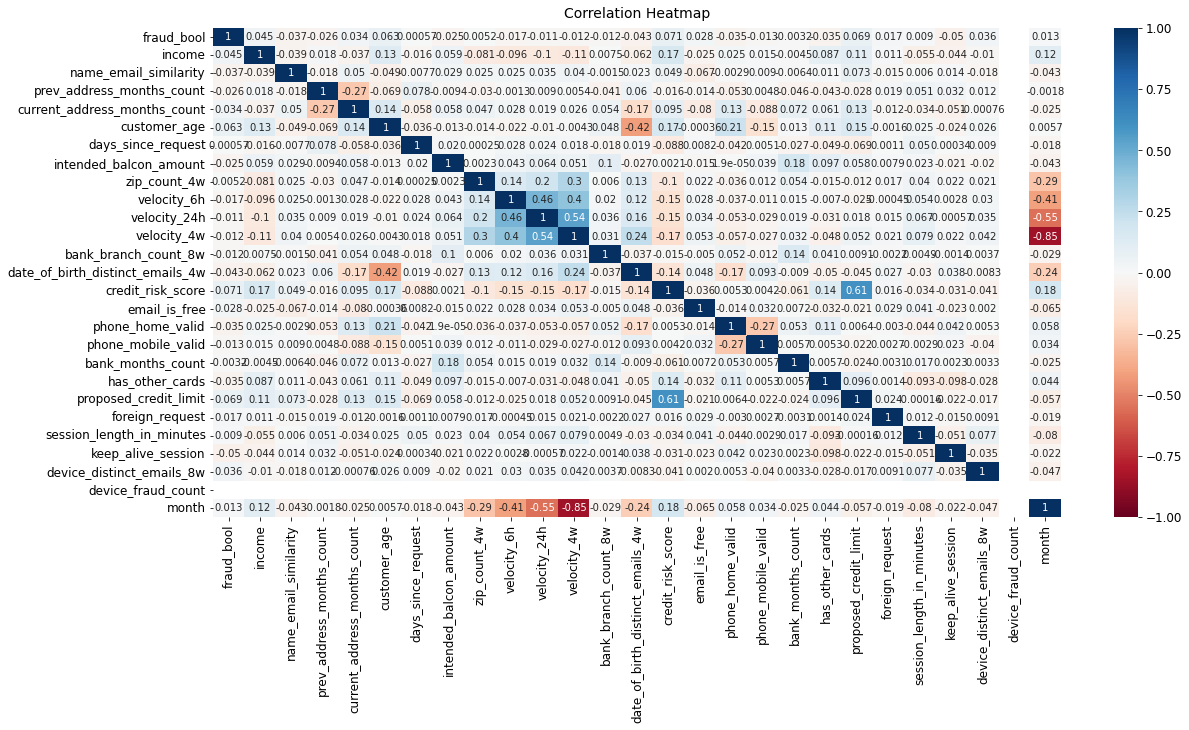

In [ ]:
#Plot Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(19,9))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10); 
from google.colab import files
plt.savefig('Corrlation_heatmap.png')
files.download('Corrlation_heatmap.png')

#### 1.2.3 Visualization Part for more insightful information

Check the relationship between current_address_months_count with number of Fraud

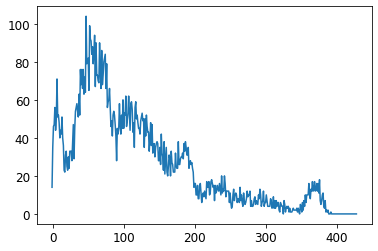

In [ ]:
cur_add= data.groupby('current_address_months_count')['fraud_bool'].sum()
plt.plot(cur_add)

Check the relationship between current_address_months_count with number of application has more than 1 card

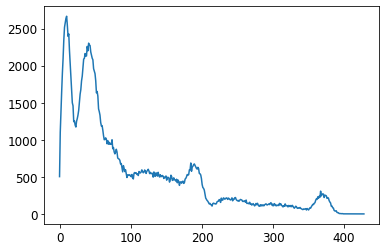

In [ ]:
cur_add_onemorecard = data.groupby('current_address_months_count')['has_other_cards'].sum()
plt.plot(cur_add_onemorecard)


#####Customer_age, credit_risk_score and propsed_credit_limit

The relationship between customer age and credit risk score

---



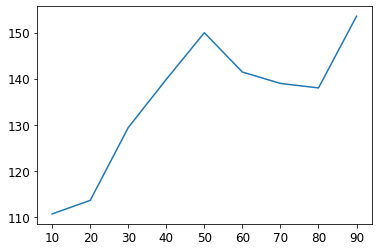

In [ ]:
credit_risk_by_age = data.groupby('customer_age')['credit_risk_score'].mean()
plt.plot(credit_risk_by_age)

The relationship between customer age and proposed credit limit

---



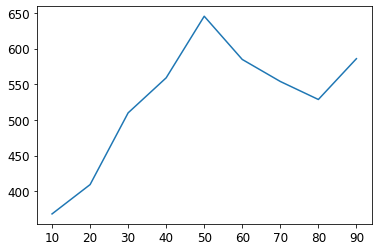

In [ ]:
proposed_credit_limit_by_age = data.groupby('customer_age')['proposed_credit_limit'].mean()
plt.plot(proposed_credit_limit_by_age)

The relationship between customer age and the number of fraud application




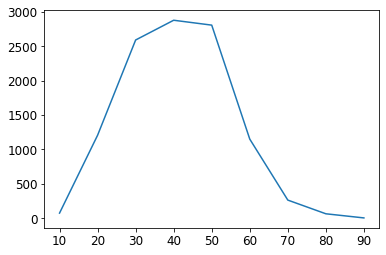

In [ ]:
fraud_bool_by_age = data.groupby('customer_age')['fraud_bool'].sum()
plt.plot(fraud_bool_by_age)

The relationship between proposed_credit_limit, current_address_months_count and prev_address_months_count



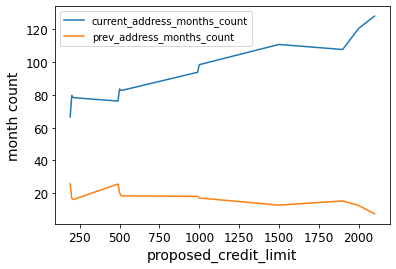

In [ ]:
x = data.groupby('proposed_credit_limit')['current_address_months_count','prev_address_months_count'].mean()
plt.xlabel("proposed_credit_limit")
plt.ylabel('month count')
plt.plot(x['current_address_months_count'],label = 'current_address_months_count')
plt.plot(x['prev_address_months_count'],label = 'prev_address_months_count')
plt.legend()

#####Month and Fraud_bool

now let's work with Month. First, check if the ratio of data bewteen each month is equal

In [ ]:
count_data_per_month = data[data['fraud_bool']==1].groupby('month').count()[['fraud_bool']]
count_data_per_month

,fraud_bool
month,
0,1500
1,1198
2,1198
3,1392
4,1452
5,1411
6,1450
7,1428


There is a significant drop on Janurary and February and the data is imbalance

##### Visualize the imbalance

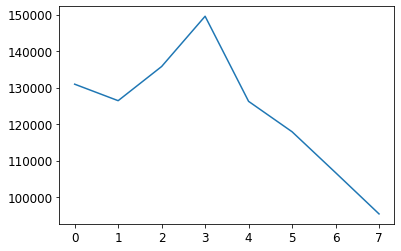

In [ ]:
num_fraud_0 = data[data['fraud_bool']==0]
num_fraud_0 = num_fraud_0.groupby('month')['fraud_bool'].count()
plt.plot(num_fraud_0)

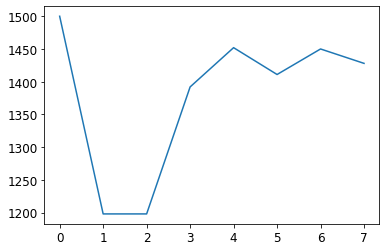

In [ ]:
num_fraud_1 = data[data['fraud_bool']==1]
num_fraud_1 = num_fraud_1.groupby('month')['fraud_bool'].count()
plt.plot(num_fraud_1)

Count the number of non-fraud application of the dataset

In [ ]:
num_0 = data[data['fraud_bool']==0]
print(num_0['fraud_bool'].count())

988971


Count the number of fraud application of the dataset

In [ ]:
num_1 = data[data['fraud_bool']==1]
print(num_1['fraud_bool'].count())

11029


#####Feature Engineering for Month


having month as numerical will confuse the model, therefore, we need to create a helper function to turn month into categorical and then encoding

In [ ]:
def change_month(x):
  if 1<=x<=2:
    return "winter"
  elif 2<x<=5:
    return "spring"
  else:
    return "summer"

Apply to column month to get new column "season"

In [ ]:
data['season'] = data['month'].apply(lambda x: change_month(x))

#####month and velocity

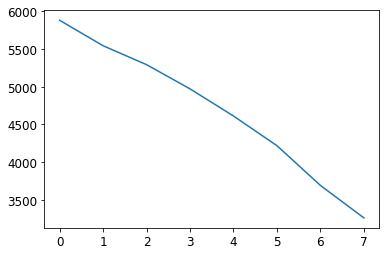

In [ ]:
x = data.groupby('month')['velocity_24h'].mean()
plt.plot(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

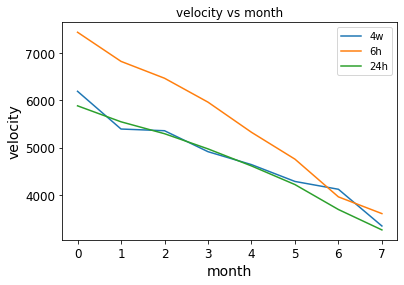

In [ ]:
x = data.groupby('month')['velocity_4w'].mean()
y = data.groupby('month')['velocity_6h'].mean()
z = data.groupby('month')['velocity_24h'].mean()
plt.plot(x, label = '4w')
plt.plot(y, label = '6h')
plt.plot(z, label = '24h')
plt.legend()
plt.title('velocity vs month')
plt.xlabel('month')
plt.ylabel('velocity')
plt.savefig('Velocity Vs Month.png')
files.download('Velocity Vs Month.png')

#####Feature Engineering for Credit Risk Score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

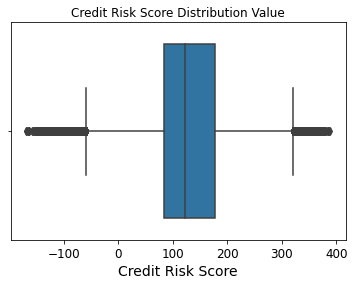

In [ ]:
x = data['credit_risk_score']
sns.boxplot(x)
plt.title('Credit Risk Score Distribution Value')
plt.xlabel('Credit Risk Score')
plt.savefig('Credit Risk Score.png')
files.download('Credit Risk Score.png')

In [ ]:
quantile_data = pd.DataFrame(x.quantile(np.linspace(.1, 1, 9, 0)))
quantile_data

,credit_risk_score
0.1,48.0
0.2,73.0
0.3,92.0
0.4,107.0
0.5,122.0
0.6,141.0
0.7,165.0
0.8,192.0
0.9,226.0


helper function to turn credit_risk_score to categorical data

In [ ]:
def range_function(x):
  if 0<x<92:
    return 'low'
  elif 92<=x<=141:
    return 'average'
  else:
    return 'high'

In [ ]:
data['range'] = data['credit_risk_score'].apply(lambda x: range_function(x))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

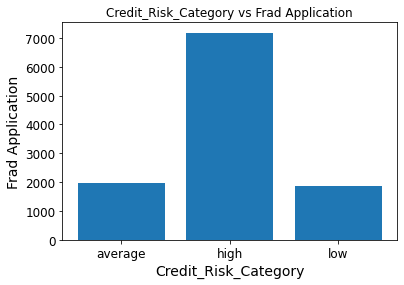

In [ ]:
x = data.groupby('range')['fraud_bool'].sum()
y = ['average','high','low']
plt.bar(y,x)
plt.title('Credit_Risk_Category vs Frad Application')
plt.xlabel('Credit_Risk_Category')
plt.ylabel('Frad Application')
plt.savefig('Credit_Risk_Category vs Frad Application.png')
files.download('Credit_Risk_Category vs Frad Application.png')

#### 1.2.4 Feature Selections for numerical data

In [ ]:
data = data.drop(columns = 'month')

In [ ]:
data = data.drop(columns = ['velocity_24h','velocity_4w','days_since_request','bank_months_count','zip_count_4w','device_fraud_count'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

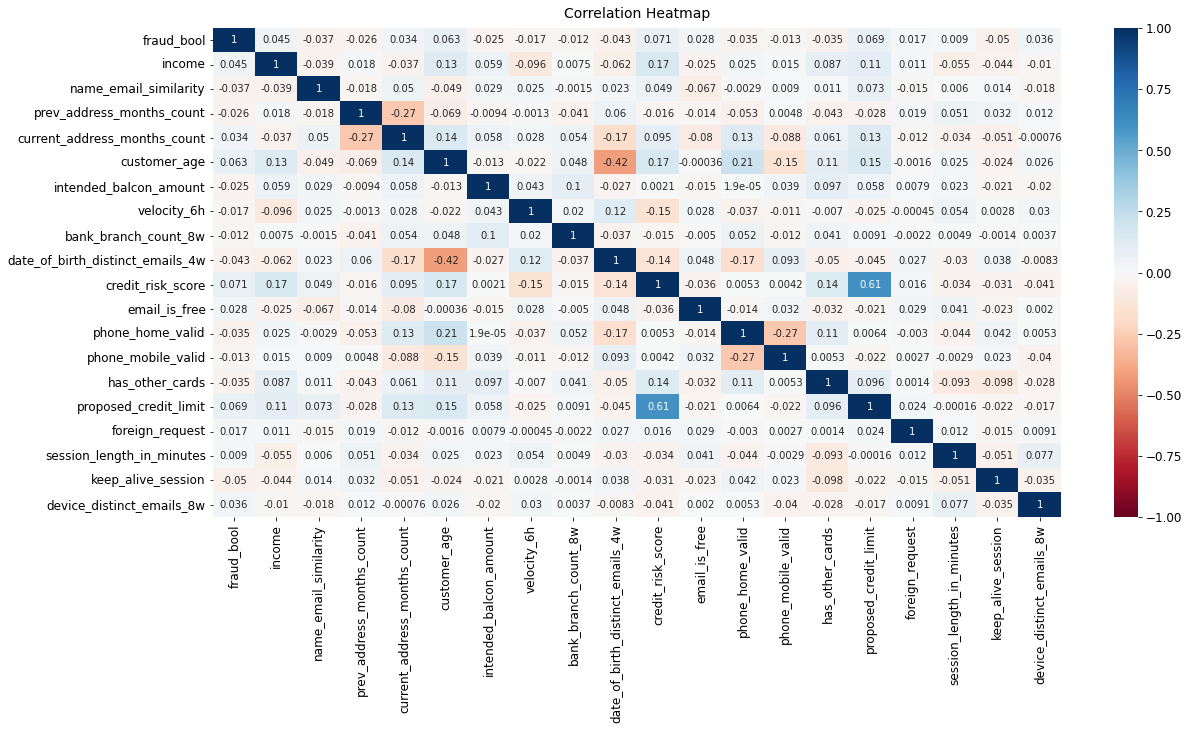

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(19,9 ))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10); 
plt.savefig('Correlation Heatmap.png')
files.download('Correlation Heatmap.png')

### 1.3 EDA Part - Work with categorical dataset

In [ ]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,payment_type,velocity_6h,bank_branch_count_8w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,season,range
0,1,0.9,0.166828,-1,88,50,-1.331345,AA,10650.765523,1,...,0,500.0,0,INTERNET,3.888115,windows,0,1,summer,high
1,1,0.9,0.296286,-1,144,50,-0.816224,AB,534.047319,718,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,summer,high
2,1,0.9,0.044985,-1,132,40,-0.755728,AC,4048.534263,1,...,0,200.0,0,INTERNET,4.728705,other,0,1,summer,high
3,1,0.9,0.159511,-1,22,50,-1.205124,AB,3457.064063,1921,...,1,200.0,0,INTERNET,2.047904,linux,0,1,summer,average
4,1,0.9,0.596414,-1,218,50,-0.773276,AB,5020.341679,1990,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,summer,high


#### 1.3.1 Visualization part for more insightful information

#####Employment Status vs Fraud Bool





<BarContainer object of 7 artists>

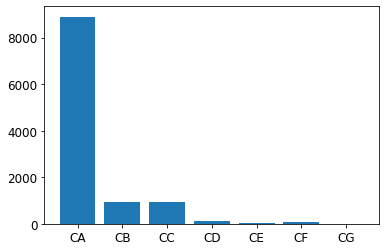

In [ ]:
employ_stat = data.groupby('employment_status')['fraud_bool'].sum()
x = employ_stat
y = data['employment_status'].unique().tolist()
plt.bar(y,x)

##### Housing Status vs Fraud Bool

['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG']


<BarContainer object of 7 artists>

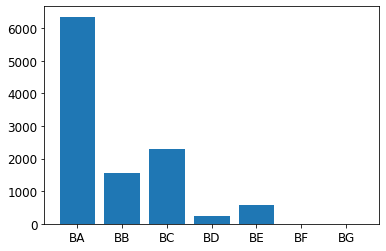

In [ ]:
housing_stat = data.groupby('housing_status')['fraud_bool'].sum()
x = housing_stat
y = data['housing_status'].unique().tolist()
print(y)
plt.bar(y,x)

##### Payment Type vs Fraud Bool

<BarContainer object of 5 artists>

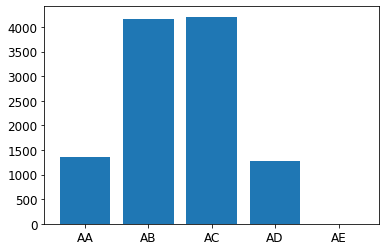

In [ ]:
payment_type = data.groupby('payment_type')['fraud_bool'].sum()
x = payment_type
y = data['payment_type'].unique().tolist()
plt.bar(y,x)

Check if season affect the number of fraud application

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

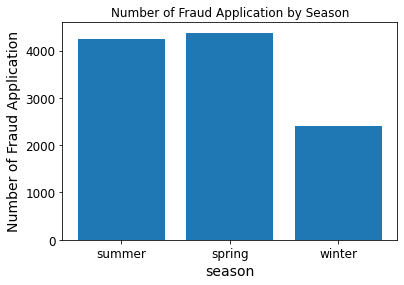

In [ ]:
season = data.groupby('season')['fraud_bool'].sum()
x = season
y = ['summer','spring','winter']
plt.bar(y,x)
plt.title('Number of Fraud Application by Season')
plt.xlabel('season')
plt.ylabel('Number of Fraud Application')
plt.savefig('Number of Fraud Application by Season.png')
files.download('Number of Fraud Application by Season.png')

<BarContainer object of 5 artists>

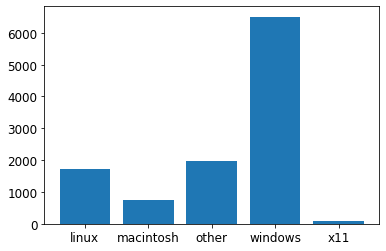

In [ ]:
device = data.groupby('device_os')['fraud_bool'].sum()
x = device
y = ['linux','macintosh','other','windows','x11']
plt.bar(y,x)

<BarContainer object of 5 artists>

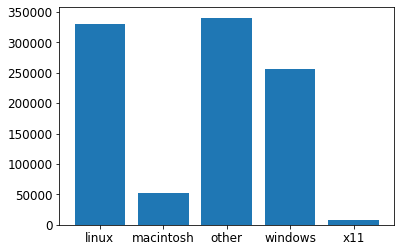

In [ ]:
fraud_0 = data[data['fraud_bool']==0]
device = fraud_0.groupby('device_os')['fraud_bool'].count()
x = device
y = ['linux','macintosh','other','windows','x11']
plt.bar(y,x)

We can clearly see that the number of fraud application using window. 

In [ ]:
source = data.groupby('source')['fraud_bool'].sum()
x = source
print(x)

source
INTERNET    10917
TELEAPP       112
Name: fraud_bool, dtype: int64


In [ ]:
source = fraud_0.groupby('source')['fraud_bool'].count()
x = source
print(x)

source
INTERNET    982035
TELEAPP       6936
Name: fraud_bool, dtype: int64


In [ ]:
data = data.drop(columns = ['source','range'])

####1.3.2 Encoding Categorical Data

In [ ]:
data = pd.get_dummies(data, columns = ['housing_status'])
data = pd.get_dummies(data, columns = ['employment_status'])
data = pd.get_dummies(data, columns = ['payment_type'])
data = pd.get_dummies(data, columns = ['season'])
data = pd.get_dummies(data, columns = ['device_os'])

###1.4 Balance Dataset

In [ ]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,payment_type_AD,payment_type_AE,season_spring,season_summer,season_winter,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,-1,88,50,-1.331345,10650.765523,1,6,...,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,-1,144,50,-0.816224,534.047319,718,3,...,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,-1,132,40,-0.755728,4048.534263,1,14,...,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,-1,22,50,-1.205124,3457.064063,1921,6,...,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,-1,218,50,-0.773276,5020.341679,1990,2,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
features = data.drop(columns = 'fraud_bool')
label = data['fraud_bool']
print(features.shape)
print(label.shape)

(1000000, 46)
(1000000,)


In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
features_rus, label_rus = rus.fit_resample(features, label)

print(features_rus.shape)
print(label_rus.shape)
features_rus.info()

(22058, 46)
(22058,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22058 entries, 0 to 22057
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            22058 non-null  float64
 1   name_email_similarity             22058 non-null  float64
 2   prev_address_months_count         22058 non-null  int64  
 3   current_address_months_count      22058 non-null  int64  
 4   customer_age                      22058 non-null  int64  
 5   intended_balcon_amount            22058 non-null  float64
 6   velocity_6h                       22058 non-null  float64
 7   bank_branch_count_8w              22058 non-null  int64  
 8   date_of_birth_distinct_emails_4w  22058 non-null  int64  
 9   credit_risk_score                 22058 non-null  int64  
 10  email_is_free                     22058 non-null  int64  
 11  phone_home_valid                  22058 non-nu

#PART 2: MODELING - SUPERVISED LEARNING

##2.1 BASELINE - LOGISTIC REGRESSION - VANILLA MODEL

####2.1.1 Split data into train and test

In [ ]:
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features_rus, label_rus, test_size=0.2, random_state=seed)

Run Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
# TO-DO: Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg.predict(x_test)
train_accuracy = log_reg.score(x_train, y_train)
# TO-DO: Find the accuracy and store the value in `test_accuracy`
test_accuracy = accuracy_score(y_test, y_pred)
print(train_accuracy)
print(test_accuracy)

0.6734670746911481
0.6704442429737081


The model is underfitting, but it is just a vanila model, now we will try to do something else to improve the model and compare with our baseline

##2.2 Running Standard Scaler - Preparing for PCA Logistic Regression

Standard Scaler and PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# TO-DO: Intermediate step to address scale-invariance
scaler = StandardScaler()
scaler.fit(x_train)
transform_x_train = scaler.transform(x_train)
transform_x_test = scaler.transform(x_test)
pca = PCA(n_components= transform_x_train.shape[1])

# TO-DO: Instantiate and Fit PCA
pca_x_train = pca.fit_transform(transform_x_train)

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(pca.explained_variance_ratio_)

####2.2.1 n_components search

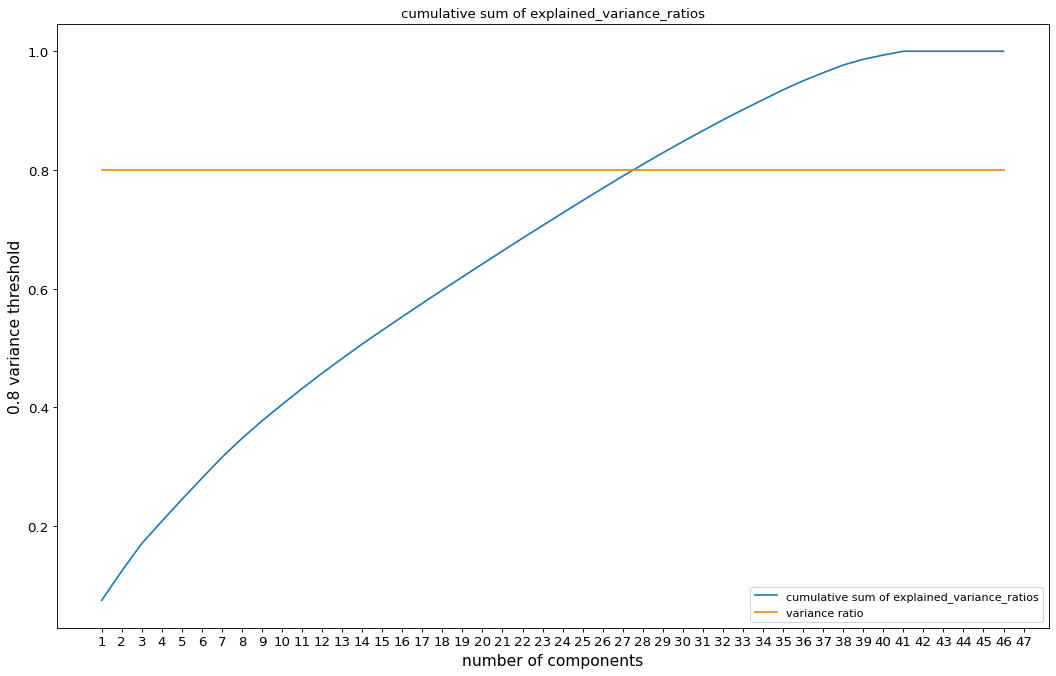

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 10), dpi=80)
plt.plot(np.arange(1, 47), cum_evr,label = "cumulative sum of explained_variance_ratios")
plt.plot(np.arange(1, 47), [0.8]*46, label = 'variance ratio')
plt.legend(loc = 'lower right')
plt.xticks(np.arange(1,48,1))
plt.title('cumulative sum of explained_variance_ratios')
plt.xlabel('number of components')
plt.ylabel('0.8 variance threshold')
plt.show()

In [ ]:
pca = PCA(n_components=28)
pca_x_train = pca.fit_transform(transform_x_train)
x_test_pca = pca.transform(transform_x_test)

#### 2.2.2 Logistic Regression with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
log_reg_pca = LogisticRegression()
log_reg_pca.fit(pca_x_train, y_train)
y_pred = log_reg_pca.predict(x_test_pca)
train_accuracy = log_reg_pca.score(pca_x_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.7911141335146775
0.7889845874886673


In [ ]:
from sklearn.metrics import f1_score
print('F1 score:',f1_score(y_test, y_pred))

F1 score: 0.7893188504186468


## 2.2 RandomForestClassifier

In [ ]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(pca_x_train, y_train)
train_accuracy = rfc.score(pca_x_train, y_train)
# predict
rfc_predict = rfc.predict(x_test_pca)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7826534806484495
Accuracy score: 0.7826382592928377
F1 score: 0.7809001599268905


##2.3 XGBoost

A powerful model, typically use for underfitting model

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cross-validation

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=seed)
xgb_cl = xgb.XGBClassifier()
scores = cross_val_score(xgb_cl, x_train, y_train, cv=cv, n_jobs=-1)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 80.45% (0.50%)


In [ ]:
# Predict
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train,y_train)
preds = xgb_cl.predict(x_test)
train_scores = xgb_cl.score(x_train,y_train)
# Score
test_score = accuracy_score(y_test, preds)
print(train_scores)
print(test_score)

0.8182590955457327
0.8014505893019039


#MODELING - UNSUPERVISED LEARNING

##3.1 K-MEAN

K-mean is scale-variant, therefore, we will use PCA with train and test

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean_data = features_rus

#### 3.1.1 StandardScaler, PCA and Kmean

In [ ]:
scaler = StandardScaler()
scaler.fit(kmean_data)
transform_kmean = scaler.transform(features_rus)


In [ ]:
pca = PCA(n_components= 2) #for 2D plot
x_pca = pd.DataFrame(pca.fit_transform(transform_kmean))
x_pca.head()

,0,1
0,1.955752,0.855417
1,2.480414,1.600889
2,3.260337,0.765328
3,0.172035,0.933201
4,0.445298,-0.117604


In [ ]:
seed = 42
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters_model = kmeans_model.fit_predict(x_pca)
centroid = kmeans_model.cluster_centers_
clusters = kmeans_model.labels_.tolist()

In [ ]:
x_pca['cluster'] = clusters


In [ ]:
x_pca

,0,1,cluster
0,1.955752,0.855417,1
1,2.480414,1.600889,1
2,3.260337,0.765328,1
3,0.172035,0.933201,2
4,0.445298,-0.117604,1
...,...,...,...
22053,-1.137153,-1.026459,0
22054,-1.033512,-0.670807,0
22055,-3.841982,-0.163794,0
22056,0.164541,-0.804669,1


#### 3.1.2 Search Number of Optimal Clusters using Elbow Method

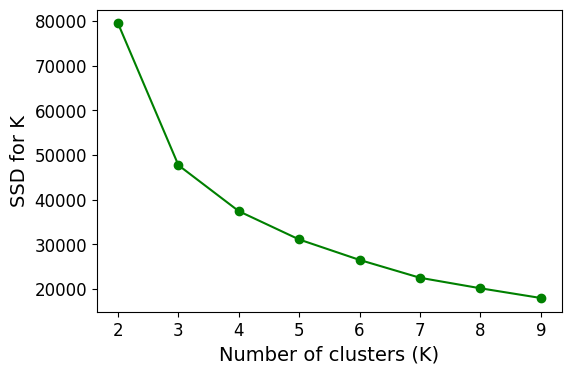

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
ssd = []
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x_pca)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 10), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()
plt.savefig('Number of clusters (K).png')
files.download('Number of clusters (K).png')

#### 3.1.3 Retrain model with optimal clusters

Retrain the model with 4

In [ ]:
seed = 42
kmeans_model = KMeans(n_clusters=4)
clusters_model = kmeans_model.fit_predict(x_pca)
centroid = kmeans_model.cluster_centers_
clusters = kmeans_model.labels_.tolist()

In [ ]:
x_pca['cluster'] = clusters
x_pca

,0,1,cluster
0,1.955752,0.855417,3
1,2.480414,1.600889,3
2,3.260337,0.765328,3
3,0.172035,0.933201,3
4,0.445298,-0.117604,1
...,...,...,...
22053,-1.137153,-1.026459,2
22054,-1.033512,-0.670807,2
22055,-3.841982,-0.163794,2
22056,0.164541,-0.804669,1


#### 3.1.4 Visualizing the number of cluster

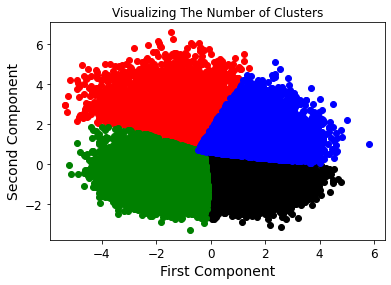

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#filter rows of original data
filtered_label0 = x_pca[x_pca['cluster'] == 0]
filtered_label1 = x_pca[x_pca['cluster'] == 1]
filtered_label2 = x_pca[x_pca['cluster'] == 2]
filtered_label3 = x_pca[x_pca['cluster'] == 3]
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green')
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'blue')
plt.title('Visualizing The Number of Clusters')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()
plt.savefig('Visualizing The Number of Clusters.png')
files.download('Visualizing The Number of Clusters.png')

## 3.2 Interpreting The Group of Applications

In [ ]:
features_rus['cluster'] = clusters

In [ ]:
application_group_0 = features_rus[features_rus['cluster']==0]
application_group_0 = application_group_0.to_csv('application_group_0.csv')

In [ ]:
application_group_1 = features_rus[features_rus['cluster']==1]
application_group_1 = application_group_1.to_csv('application_group_1.csv')

In [ ]:
application_group_2 = features_rus[features_rus['cluster']==2]
application_group_2 = application_group_2.to_csv('application_group_2.csv')

In [ ]:
application_group_3 = features_rus[features_rus['cluster']==3]
application_group_3 = application_group_3.to_csv('application_group_3.csv')

In [ ]:
features_rus = features_rus.to_csv('features_rus.csv')